In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

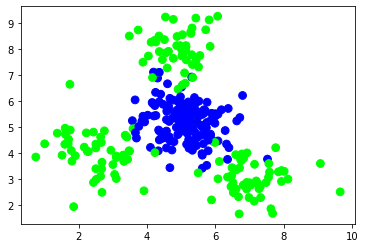

In [42]:
#1.数据加载&观察
data = pd.read_csv('multiple2.txt', header = None, names = ['x1', 'x2', 'y'])
plt.scatter(data['x1'], data['x2'], s = 60, c = data['y'], cmap = 'brg')

In [43]:
#2.数据集拆分
import sklearn.model_selection as ms
x, y = data.loc[:, :'x2'], data['y']
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size = 0.1, random_state=7)

In [44]:
#3.1 使用svm.linear进行训练
import sklearn.svm as svm
model = svm.SVC(kernel = 'linear')
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)

In [45]:
#3.2 得出分类报告
import sklearn.metrics as sm
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.93      0.72        15
           1       0.83      0.33      0.48        15

    accuracy                           0.63        30
   macro avg       0.71      0.63      0.60        30
weighted avg       0.71      0.63      0.60        30



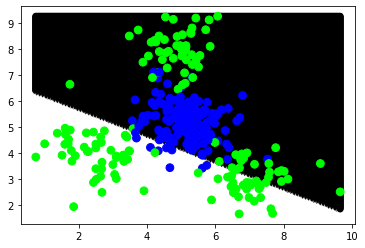

In [46]:
#3.3 绘制svm.linear的分界线，将样本空间拆细一些，预测每个点的类别，绘制背景
pxs = np.linspace(data['x1'].min(), data['x1'].max(), 200)
pys = np.linspace(data['x2'].min(), data['x2'].max(), 200)
plot_data = []
for i in pxs:
    for j in pys:
        plot_data.append([i, j])
plot_data = np.array(plot_data)
plot_y = model.predict(plot_data)
plt.scatter(plot_data[:,0], plot_data[:,1], c = plot_y, cmap = 'gray')
plt.scatter(data['x1'], data['x2'], s = 60, c = data['y'], cmap = 'brg')
plt.show()

In [47]:
#4.1 使用svm.poly进行训练
model = svm.SVC(kernel = 'poly', degree = 2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)

In [48]:
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



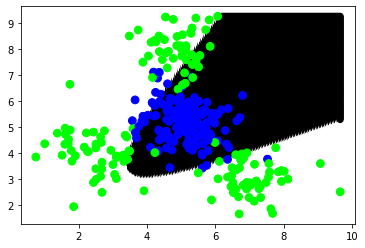

In [49]:
plot_y = model.predict(plot_data)
plt.scatter(plot_data[:,0], plot_data[:,1], c = plot_y, cmap = 'gray')
plt.scatter(data['x1'], data['x2'], s = 60, c = data['y'], cmap = 'brg')
plt.show()

In [54]:
#使用径向基核函数
model = svm.SVC(kernel = 'rbf', C=600, gamma = 0.01)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
plot_y = model.predict(plot_data)
plt.scatter(plot_data[:,0], plot_data[:,1], c = plot_y, cmap = 'gray')
plt.scatter(data['x1'], data['x2'], s = 60, c = data['y'], cmap = 'brg')
plt.show()